## Data Exploration for various Gamma, Epsilon, and Epsilon Decay Values
This data was generated iteratively by running various combination of these 3 values through 100 trails on the Smartcab Agent using Q-Learning.  Originally I was going to include alpha values as well, but changed to a time dependent alpha decay so that Q_hat converges to Q. 

In [1]:
import os
import pandas as pd

data_frame_dict = {}

# get text files 
for index, csv_file in enumerate(os.listdir('./csv_files/')):
    if csv_file.endswith(".csv"):
        data_frame_dict[index] = pd.DataFrame.from_csv('./csv_files/' + csv_file)

# check dataframes were loaded in dictionary
data_frame_dict[0].head()

,Gamma,Epsilon,Epsilon Decay,Start Location,Desination,Deadline,Successful?
Trial,,,,,,,
Trial 1.0,0.8,0.5,0.95,"(4, 5)","(7, 4)",20,No
Trial 1.1,0.8,0.5,0.95,"(2, 5)","(5, 4)",20,No
Trial 1.2,0.8,0.5,0.95,"(8, 4)","(5, 5)",20,Yes
Trial 1.3,0.8,0.5,0.95,"(5, 4)","(7, 2)",20,No
Trial 1.4,0.8,0.5,0.95,"(7, 6)","(7, 1)",25,Yes


In [2]:
from itertools import product

def success_frame_dictionary(dictionary):
    success_frame_dict = {}
    
    # get lists of every unique Gamma, Epsilon and Epsilon Decay value
    gamma_values = [round(x, 2) for x in data_frame_dict[0]['Gamma'].unique()]
    epsilon_values = [round(x, 2) for x in data_frame_dict[0]['Epsilon'].unique()]
    epsilon_decay_values = [round(x, 2) for x in data_frame_dict[0]['Epsilon Decay'].unique()]
    
    # columns to track 
    columns_to_track = ['Gamma', 'Epsilon', 'Epsilon Decay']

    for key, dframe in dictionary.iteritems():
        
        # create a new empty dataframe 
        success_frame = pd.DataFrame()
        
        # for every combination of Gamma, Epsilon, and Epsilon Decay Count Successes 
        for combination in product(gamma_values, epsilon_values, epsilon_decay_values):
            num_successes =  len(dframe[(dframe['Gamma'] == combination[0]) & (dframe['Epsilon'] == combination[1]) & 
                                (dframe['Epsilon Decay'] == combination[2]) & (dframe['Successful?'] == 'Yes')])
        
            # initalize empty row 
            row = [] 
            row.append(combination[0]) # append gamma
            row.append(combination[1]) # append epsilon
            row.append(combination[2]) # append epsilon decay
            row.append(num_successes) # append number of successes 
            success_frame = success_frame.append(pd.Series(row), ignore_index=True) #add row to success frame 

        columns_string = 'Gamma Epsilon Epsilon_Decay Successes_' + str(key)
        success_frame.columns = columns_string.split(' ') # add column names 
        success_frame_dict[key] = success_frame
    
    return success_frame_dict

success_frame_dict = success_frame_dictionary(data_frame_dict)
success_frame_dict[0].head()

,Gamma,Epsilon,Epsilon_Decay,Successes_0
0,0.8,0.5,0.95,73.0
1,0.8,0.5,0.96,3.0
2,0.8,0.5,0.97,2.0
3,0.8,0.5,0.98,53.0
4,0.8,0.5,0.99,0.0


In [3]:
def index_dataframes(dictionary):
    indexed_dframe_dict = {}
    for key, dframe in dictionary.iteritems():
        dframe_indexed = dframe.set_index(['Gamma', 'Epsilon', 'Epsilon_Decay'])
        indexed_dframe_dict[key] = dframe_indexed
        
    return indexed_dframe_dict

indexed_dataframe_dict = index_dataframes(success_frame_dict)
indexed_dataframe_dict[0].head()

Successes_0
Gamma Epsilon Epsilon_Decay             
0.8   0.5     0.95                  73.0
              0.96                   3.0
              0.97                   2.0
              0.98                  53.0
              0.99                   0.0

### Plotting the Data 

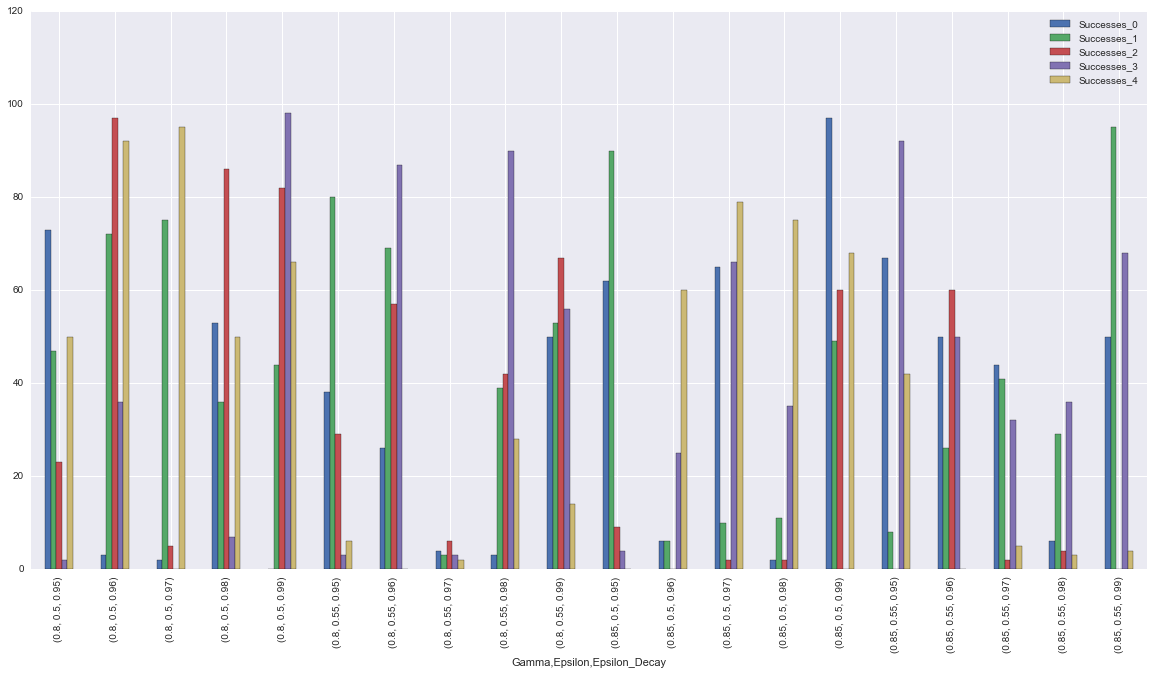

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = (20, 10) 

for key, dataframe in indexed_dataframe_dict.iteritems():
    if key == 0:
        joined_frame = dataframe
    else:
        joined_frame = joined_frame.join(dataframe)
        
joined_frame.head()

joined_frame.plot(kind='bar', ylim=(0,120))

The clear winner in this case is Gamma = 0.85, Epsilon = 0.6, and Epsilon Decay = 0.97

### Box plots vs individual variables

#### Gamma vs Successes Plot

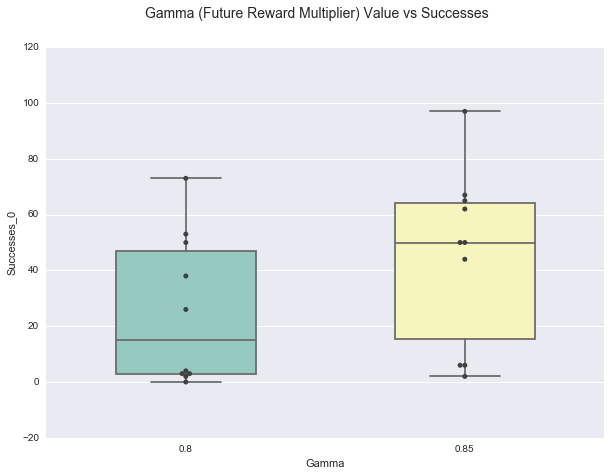

In [12]:
plt.rcParams['figure.figsize'] = (10, 7.0)
plt.suptitle('Gamma (Future Reward Multiplier) Value vs Successes', fontsize=14)
sns.boxplot(success_frame_dict[0]['Gamma'], success_frame_dict[0]['Successes_0'], palette="Set3", width=0.5)
sns.swarmplot(success_frame_dict[0]['Gamma'], success_frame_dict[0]['Successes_0'], color=".25")

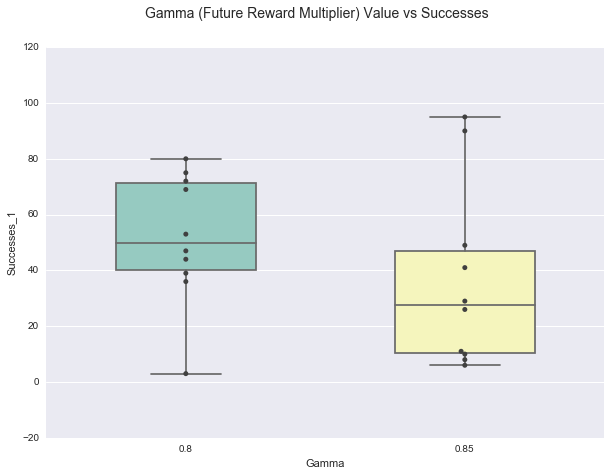

In [13]:
plt.rcParams['figure.figsize'] = (10, 7.0)
plt.suptitle('Gamma (Future Reward Multiplier) Value vs Successes', fontsize=14)
sns.boxplot(success_frame_dict[1]['Gamma'], success_frame_dict[1]['Successes_1'], palette="Set3", width=0.5)
sns.swarmplot(success_frame_dict[1]['Gamma'], success_frame_dict[1]['Successes_1'], color=".25")

Indvidual inspection shows that a Gamma Value of 0.85 seems to be the best performer (average) accross all Gamma values.  However the Standard Deviation is quite large, so my plan is to also look at Gamma of 0.80 which has a little tighter box plot and the second highest average if the performance from the winning combo is not consistent.

#### Epsilon Vs Successes Plot

In [ ]:
plt.suptitle('Epsilon (Greedy Exploration) Value vs Successes', fontsize=14)
sns.boxplot(success_frame['Epsilon'], success_frame['Successes'], palette="Set3", width=0.5)
sns.swarmplot(success_frame['Epsilon'], success_frame['Successes'], color=".25")

The highest average Epsilon value is 0.4, but since the max value was 0.6 I'm going to explore this value if the winning combination is not consistent 

#### Epsilon Decay vs Successes Plot

In [ ]:
plt.suptitle('Epsilon Decay (Exploration vs Exploitation) Value vs Successes', fontsize=14)
sns.boxplot(success_frame['Epsilon Decay'], success_frame['Successes'], palette="Set3", width=0.5)
sns.swarmplot(success_frame['Epsilon Decay'], success_frame['Successes'], color=".25")

The epsilon decay value with the highest average in this case in 0.97 with 0.99 also showing promising results in the 60-80 successes range. 